In [1]:
import pandas as pd

df = pd.read_csv("vary_m_0_1.csv")

# Rename columns
df.rename(
    columns={
        "Grad_acc_mean": "GradEM_acc_mean",
        "Grad_wacc_mean": "GradEM_wacc_mean",
        "Grad_tau_mean": "GradEM_tau_mean",
        "Grad_acc_std": "GradEM_acc_std",
        "Grad_wacc_std": "GradEM_wacc_std",
        "Grad_tau_std": "GradEM_tau_std",
    },
    inplace=True
)

# Drop the first row
# df = df.iloc[1:]


# Inspect
df.head()

,N,K,M,PGEM_acc_mean,PGEM_acc_std,PGEM_wacc_mean,PGEM_wacc_std,PGEM_tau_mean,PGEM_tau_std,BT_acc_mean,...,CrowdBT_wacc_mean,CrowdBT_wacc_std,CrowdBT_tau_mean,CrowdBT_tau_std,GradEM_acc_mean,GradEM_acc_std,GradEM_wacc_mean,GradEM_wacc_std,GradEM_tau_mean,GradEM_tau_std
0,500,50,5000,0.825911,0.013075,0.930166,0.010385,0.651822,0.026151,0.818293,...,0.933389,0.029854,0.663030,0.051516,0.835427,0.010950,0.937625,0.007899,0.670854,0.021901
1,500,50,10000,0.882388,0.008340,0.967175,0.004755,0.764776,0.016680,0.865991,...,0.968249,0.004533,0.767376,0.015722,0.885277,0.007544,0.969110,0.004068,0.770553,0.015087
2,500,50,20000,0.916989,0.005026,0.984094,0.001165,0.833978,0.010051,0.902837,...,0.983921,0.001103,0.832837,0.010246,0.917487,0.004784,0.984376,0.001059,0.834974,0.009568
3,500,50,40000,0.941330,0.004187,0.992371,0.000789,0.882659,0.008374,0.928851,...,0.992092,0.000869,0.880351,0.008761,0.941228,0.004210,0.992413,0.000828,0.882456,0.008419


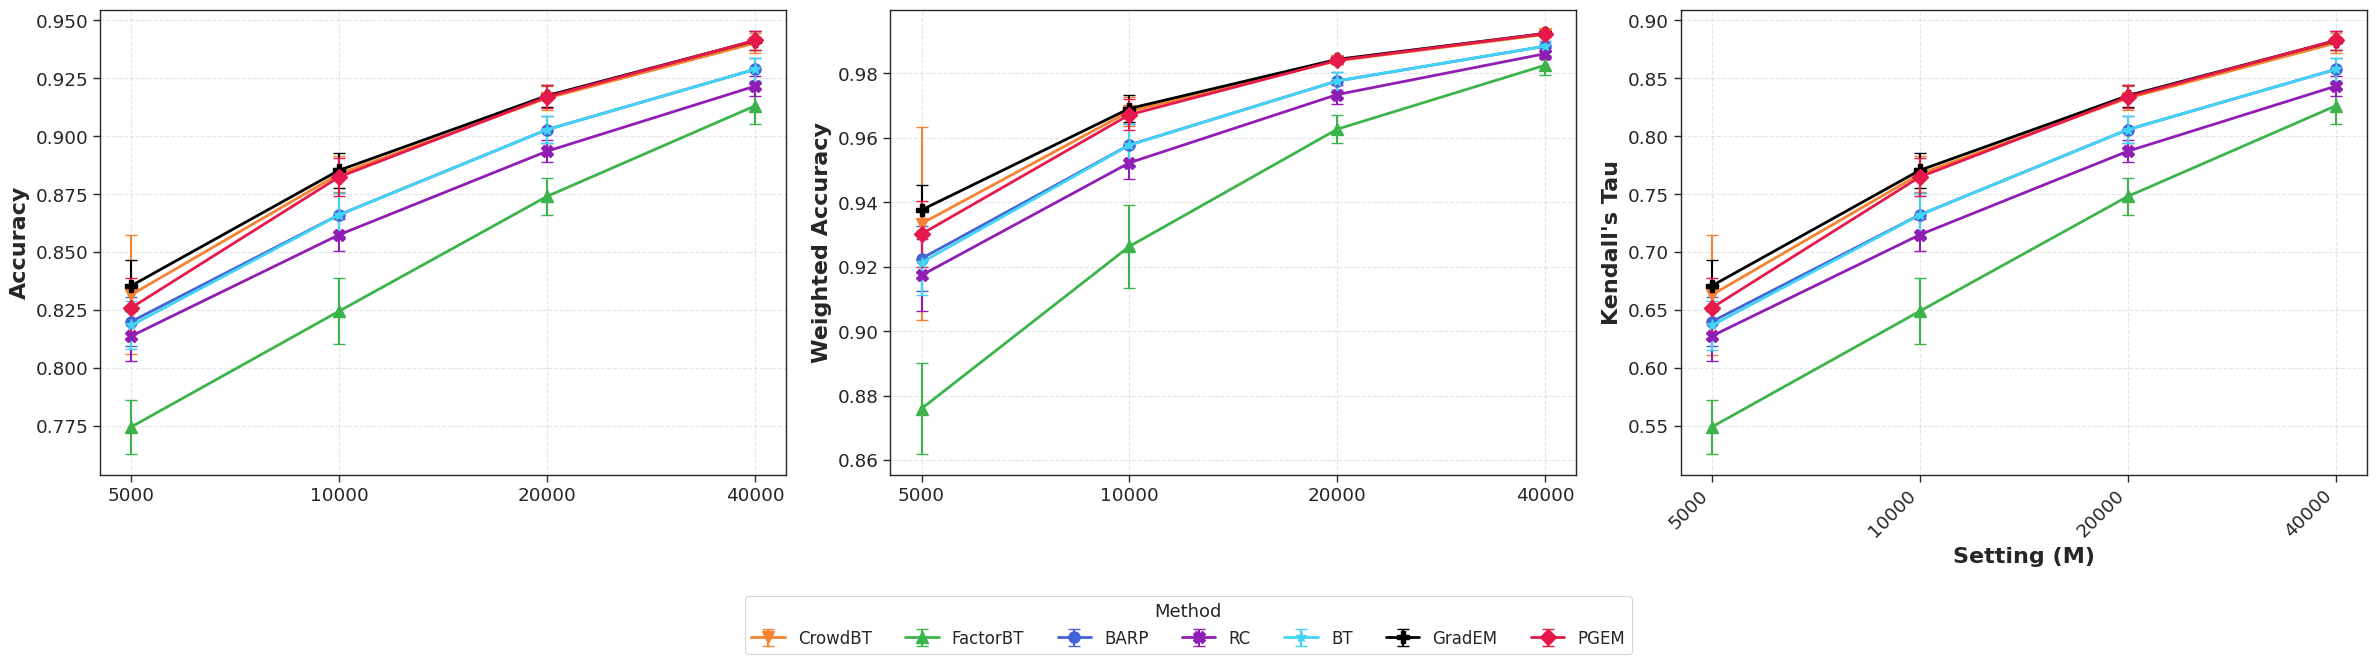

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure N and K are treated as integers
df['M'] = df['M'].astype(int)

# Create "Setting" column for the X-axis label in (N, K) format
df['Setting'] = df['M'].astype(str)

# Sort the dataframe
df = df.sort_values(by=['M'])

# Extract the sorted settings and create an index for plotting
settings_order = df['Setting'].values
x_indices = np.arange(len(settings_order))

# Define the parameters
methods = ['CrowdBT', 'FactorBT', 'BARP', 'RC', 'BT','GradEM', 'PGEM']
metrics = ['acc', 'wacc', 'tau']

# Six distinct high-contrast colors
colors = ["#F58231" , "#3CB44B", "#4363D8", "#911EB4", "#42D4F4", "#010000", "#E6194B"]
        



# colors = sns.color_palette("husl", len(methods))
markers = ['v',  '^', 'o', 'X', '*', 'P', 'D']

# Styling
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)

# Create a single figure with 3 subplots stacked vertically
# sharex=True ensures that only the bottom plot needs x-labels
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharex=True)
title_map = {'acc': 'Accuracy', 'wacc': 'Weighted Accuracy', 'tau': "Kendall's Tau"}

handles, labels = [], []

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    for j, method in enumerate(methods):
        mean_col = f"{method}_{metric}_mean"
        std_col = f"{method}_{metric}_std"
        
        means = df[mean_col].values
        stds = df[std_col].values
        
        line = ax.errorbar(x_indices, means, yerr=stds, label=method, 
                           marker=markers[j], markersize=8, 
                           capsize=4, elinewidth=1.5, linewidth=2, 
                           color=colors[j])
        
        # Collect handles for the legend from the first subplot
        if i == 0:
            handles.append(line)
            labels.append(method)
        
    # Formatting each subplot
    ax.set_ylabel(title_map.get(metric, metric.upper()), fontsize=16, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Only show the X-axis labels on the bottom subplot
    if i == 2:
        ax.set_xticks(x_indices)
        ax.set_xticklabels(settings_order, rotation=45, ha='right')
        ax.set_xlabel('Setting (M)', fontsize=16, fontweight='bold')

# Add a single legend for the entire figure at the top
fig.legend(handles, labels, title="Method", loc='upper center', 
           bbox_to_anchor=(0.5, 0), ncol=8, 
           fontsize=12, title_fontsize=13, frameon=True)

plt.tight_layout()

os.makedirs("svgs",exist_ok=True)
os.makedirs("pdfs",exist_ok=True)

# --- SAVING AS SVG AND PDF ---
# Saving as SVG (Scalable Vector Graphics)
plt.savefig('svgs/vary_m_0_1.svg', format='svg', bbox_inches='tight')

# Saving as PDF
plt.savefig('pdfs/vary_m_0_1.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [3]:
import pandas as pd

df = pd.read_csv("vary_m_-1_1.csv")

# Rename columns
df.rename(
    columns={
        "Grad_acc_mean": "GradEM_acc_mean",
        "Grad_wacc_mean": "GradEM_wacc_mean",
        "Grad_tau_mean": "GradEM_tau_mean",
        "Grad_acc_std": "GradEM_acc_std",
        "Grad_wacc_std": "GradEM_wacc_std",
        "Grad_tau_std": "GradEM_tau_std",
    },
    inplace=True
)

# Drop the first row
# df = df.iloc[1:]


# Inspect
df.head()

,N,K,M,PGEM_acc_mean,PGEM_acc_std,PGEM_wacc_mean,PGEM_wacc_std,PGEM_tau_mean,PGEM_tau_std,BT_acc_mean,...,CrowdBT_wacc_mean,CrowdBT_wacc_std,CrowdBT_tau_mean,CrowdBT_tau_std,GradEM_acc_mean,GradEM_acc_std,GradEM_wacc_mean,GradEM_wacc_std,GradEM_tau_mean,GradEM_tau_std
0,500,50,5000,0.825400,0.011424,0.926725,0.009517,0.650800,0.022849,0.553814,...,0.931835,0.013952,0.663647,0.029364,0.835267,0.011043,0.934577,0.009807,0.670533,0.022086
1,500,50,10000,0.882598,0.006670,0.968193,0.005044,0.765196,0.013340,0.577500,...,0.968001,0.005305,0.765485,0.013415,0.885976,0.006113,0.969892,0.004768,0.771951,0.012226
2,500,50,20000,0.917704,0.004842,0.985063,0.002086,0.835408,0.009684,0.604084,...,0.984666,0.002272,0.833146,0.009816,0.918160,0.004643,0.985275,0.001959,0.836321,0.009286
3,500,50,40000,0.940077,0.002830,0.991757,0.001264,0.880155,0.005660,0.642407,...,0.991246,0.001479,0.877095,0.006047,0.940138,0.002716,0.991739,0.001302,0.880276,0.005432


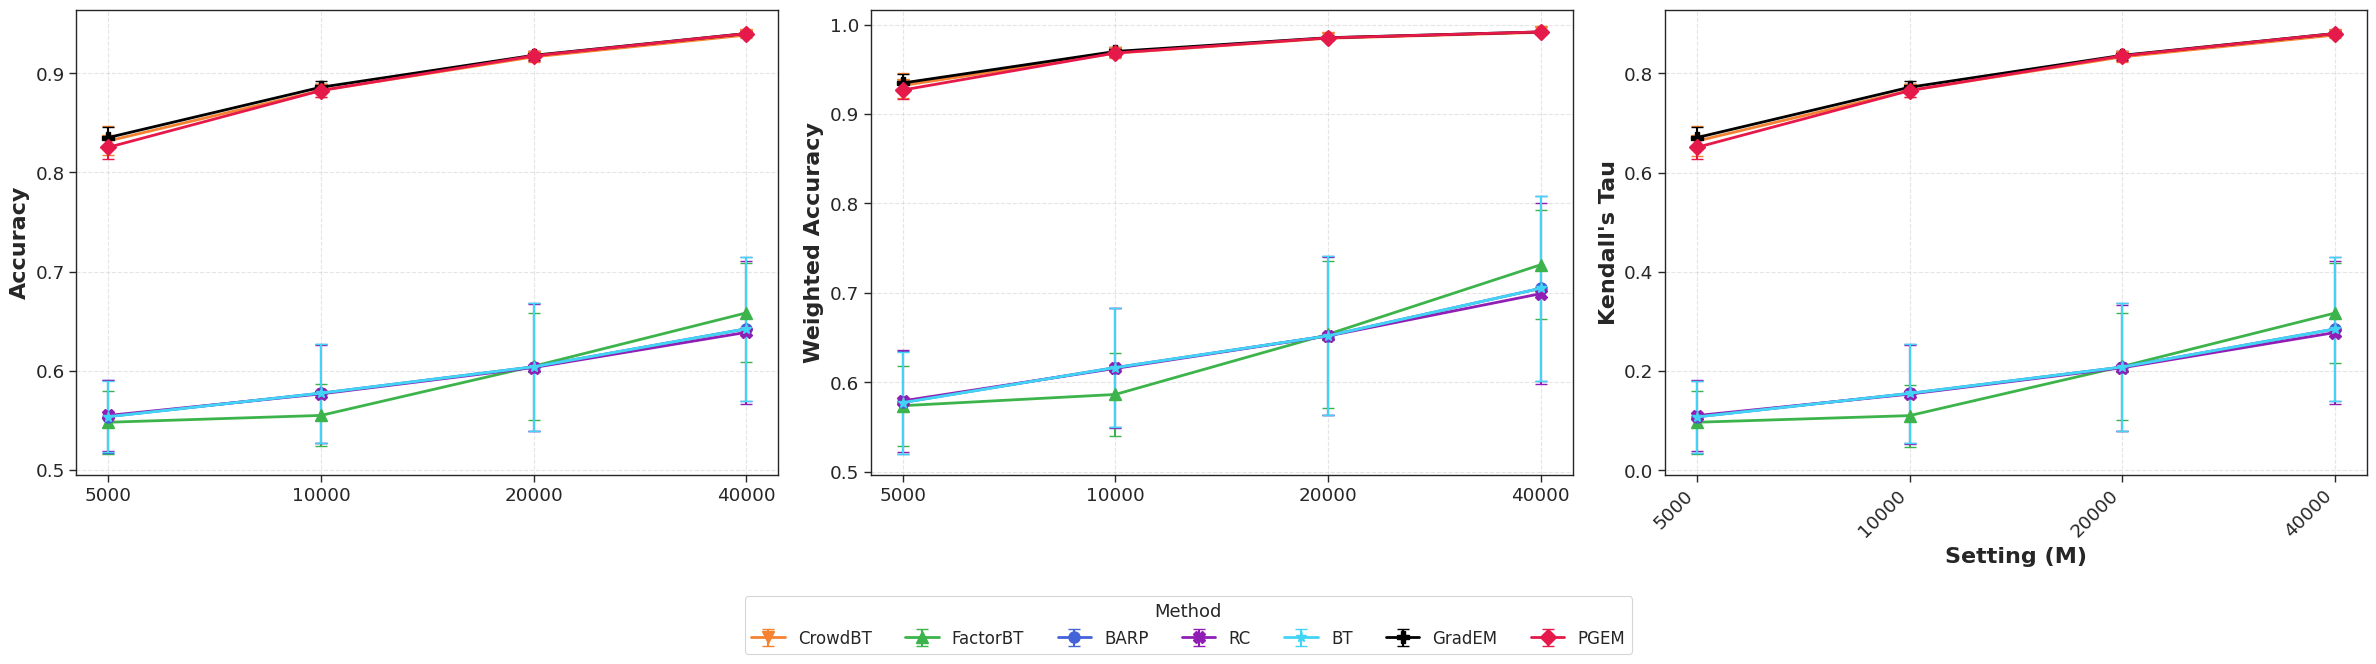

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure N and K are treated as integers
df['M'] = df['M'].astype(int)

# Create "Setting" column for the X-axis label in (N, K) format
df['Setting'] = df['M'].astype(str)

# Sort the dataframe
df = df.sort_values(by=['M'])

# Extract the sorted settings and create an index for plotting
settings_order = df['Setting'].values
x_indices = np.arange(len(settings_order))

# Define the parameters
methods = ['CrowdBT', 'FactorBT', 'BARP', 'RC', 'BT','GradEM', 'PGEM']
metrics = ['acc', 'wacc', 'tau']

# Six distinct high-contrast colors
colors = ["#F58231" , "#3CB44B", "#4363D8", "#911EB4", "#42D4F4", "#010000", "#E6194B"]
        



# colors = sns.color_palette("husl", len(methods))
markers = ['v',  '^', 'o', 'X', '*', 'P', 'D']

# Styling
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)

# Create a single figure with 3 subplots stacked vertically
# sharex=True ensures that only the bottom plot needs x-labels
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharex=True)
title_map = {'acc': 'Accuracy', 'wacc': 'Weighted Accuracy', 'tau': "Kendall's Tau"}

handles, labels = [], []

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    for j, method in enumerate(methods):
        mean_col = f"{method}_{metric}_mean"
        std_col = f"{method}_{metric}_std"
        
        means = df[mean_col].values
        stds = df[std_col].values
        
        line = ax.errorbar(x_indices, means, yerr=stds, label=method, 
                           marker=markers[j], markersize=8, 
                           capsize=4, elinewidth=1.5, linewidth=2, 
                           color=colors[j])
        
        # Collect handles for the legend from the first subplot
        if i == 0:
            handles.append(line)
            labels.append(method)
        
    # Formatting each subplot
    ax.set_ylabel(title_map.get(metric, metric.upper()), fontsize=16, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Only show the X-axis labels on the bottom subplot
    if i == 2:
        ax.set_xticks(x_indices)
        ax.set_xticklabels(settings_order, rotation=45, ha='right')
        ax.set_xlabel('Setting (M)', fontsize=16, fontweight='bold')

# Add a single legend for the entire figure at the top
fig.legend(handles, labels, title="Method", loc='upper center', 
           bbox_to_anchor=(0.5, 0), ncol=8, 
           fontsize=12, title_fontsize=13, frameon=True)

plt.tight_layout()

os.makedirs("svgs",exist_ok=True)
os.makedirs("pdfs",exist_ok=True)

# --- SAVING AS SVG AND PDF ---
# Saving as SVG (Scalable Vector Graphics)
plt.savefig('svgs/vary_m_-1_1.svg', format='svg', bbox_inches='tight')

# Saving as PDF
plt.savefig('pdfs/vary_m_-1_1.pdf', format='pdf', bbox_inches='tight')

plt.show()